# Lab:  Simple linear regression

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the demo for the unit to see an example of these operations on an automobile dataset.  This lab uses the Ames Housing data set, which is a widely-used machine learning data set for illustrating basic concepts.  

## Loading the data

The Ames housing data set was collected in the late 2000s as an alternative to the (very famous but ethically problematic) Boston housing dataset.  Both are set up to predict the sales price of a house given various characteristics of the house and neighborhood.  

We first load the Ames housing dataset, which happens to be built into sklearn.

In [1]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

Let's see what the dataset contains.

In [2]:
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


For our purposes, the most important components of `housing` are
* `data`: which contains the information for various houses,
* `target`: which contains their sale prices,
* `feature_names`: which contains a list of the feature names, and
* `DESCR`: which describes the dataset

Let's print the description.

In [3]:
print(housing.DESCR)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

Let's turn this dataset into a `pandas` dataframe for ease of handling.

In [3]:
import pandas as pd
df = pd.DataFrame(housing.data) # load numerical data

Display the first six rows of the data frame

In [4]:
df.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal
5,6.0,50.0,RL,85.0,14115.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,MnPrv,Shed,700.0,10.0,2009.0,WD,Normal


If you look closely, you'll notice that not all of the feature names in `data` match those in `DESCR`.  So write a line of code that prints out the actual feature names, similar to how you printed `housing.DESCR` earlier. 

In [7]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Basic Manipulations on the Data

What is the shape of the data?  How many features are there?  How many samples?
Write code to print a statement of the form:

    num samples=xxx, num features=yy

In [37]:
print(f"num samples = {df.shape[0]}, num features = {df.shape[1]}")

num samples = 1460, num features = 80


Create a NumPy target vector `y` from the values in `housing.target` using the `numpy.array` command.

In [9]:
import numpy as np

y = np.array(housing.target)

Use the target vector `y` to find the mean sale price in thousands of dollars and the fraction of homes that are above $250k. Write code that prints statements of the form:

    The mean house price is xxx.yy thousands of dollars.
    Only xx.y percent are above $250k.

In [24]:
y_mean = np.mean(y)
above250 = sum(y>250000)/len(y)*100
print(f"The mean house price is {y_mean} thousands of dollars.\nOnly {above250:.2f} percent are above $250k.")

The mean house price is 180921.19589041095 thousands of dollars.
Only 14.86 percent are above $250k.


## Visualizing the Data

Python's `matplotlib` has very good routines for plotting data that closely follow the syntax of MATLAB plotting commands.  You can load the `matplotlib` package with the following commands.

In [25]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, let's create a NumPy vector `x` that contains the values in the `1stFlrSF` column, which represents the area of the first floor of the house in units of square-feet.

In [27]:
x = np.array(df["1stFlrSF"])

Create a scatter plot of the price versus the `1stFlrSF` attribute.  You can use either `plt.plot(...,'o')` or `plt.scatter`.  Make sure your plot has grid lines and label the axes with reasonable labels, so that someone else can understand the plot.  

Text(0, 0.5, 'price')

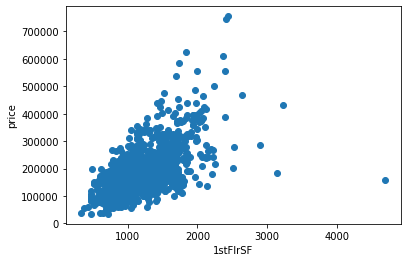

In [29]:
plt.plot(x,y,'o')
plt.xlabel("1stFlrSF")
plt.ylabel("price")

## Fitting a Simple Linear Model

Let's try to predict the house price from the area of the first floor.  To do this, we will write a simple function that performs a least-squares linear fit.  Use the formulae from the notes to compute the parameters $\beta_0,\beta_1$ in the linear model $y \approx \beta_0 + \beta_1 x$, as well as the coefficient of determination, $R^2$.

In [30]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = beta0 + beta1*x, 
    The function returns beta0, beta1 and rsq, where rsq is the coefficient of determination.
    """
    # TODO complete the following code
    xm = np.mean(x)
    ym = np.mean(y)
    sxx = np.mean((x-xm)**2)
    syy = np.mean((y-ym)**2)
    sxy = np.mean((x-xm)*(y-ym))
    beta1 = sxy/sxx
    beta0 = ym - beta1*xm
    rsq = sxy**2/sxx/syy

    return beta0, beta1, rsq

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `rsq` for the linear model.

In [33]:
beta0, beta1, rsq = fit_linear(x,y)
print(f"beta0:{beta0:.2f}, beta1:{beta1:.2f}, rsq:{rsq:.2f}")

beta0:36173.45, beta1:124.50, rsq:0.37


Generate a scatter plot similar to above, but now with the regression line superimposed.  You can do this by first creating a vector of linearly spaced points `xp` that span the range from the minimum value in `x` to the maximum value in `x`, and then computing the corresponding linear predictions `yp`, and finally superimposing the plot of `yp` versus `xp`.

In [34]:
xp = x
yp = beta0 + beta1*x

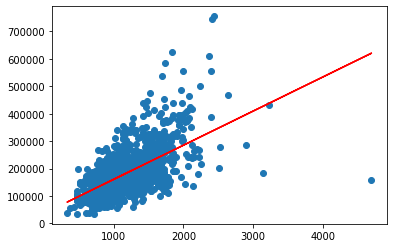

In [36]:
plt.plot(x,y,'o')
plt.plot(xp,yp,color='red')

# Compute coefficients of determination for all features

Finally, we will compute the $R^2$ values for all floating-point features in the dataset and print the values in a table. Your table should look like the following, where each the first column is the feature name and the second column is the $R^2$ value.

    Id             0.000
    MSSubClass     0.007
    LotFrontage    0.124
    ...            ...

To index over the set of columns in a dataframe `df`, you can either loop over the name string `str` in the `df.column` list and then extract the column data via `df[str]`, or loop over the integer column index `j` and then extract the column data using `df.iloc[:,j]`.

Only consider the features with datatype `float64`.  (We'll learn how to handle "categorical" data in the next unit.) You can check the datatype of a feature using the `df.dtypes` method.

Also, some features have a few missing data entries that you will need to omit.  By default, pandas codes the missing data as NaN, and so if you don't omit the missing data your $R^2$ values will also be NaN.  Check for the presence/absence of NaNs using either `df.notna()` in pandas or `np.isnan()` in numpy, and then compute the linear fit on the non-NaN data for each feature.  You can do the last part by constructing an array of logical values `i_valid` and then extracting the valid datapoints via `x[i_valid]` and `y[i_valid]`.

In [70]:
all_rsq = []
df_filtered = df.loc[:,df.dtypes=="float64"]
for col in list(df_filtered.columns):
    x_each = np.array(df[col])
    i_valid = np.invert(np.isnan(x_each))
    rsq_each = fit_linear(x_each[i_valid],y[i_valid])[2]
    all_rsq.append((col,rsq_each))
df_rsq = pd.DataFrame(all_rsq, columns =['feature', 'rsq'])
df_rsq

,feature,rsq
0,Id,0.000480
1,MSSubClass,0.007104
2,LotFrontage,0.123763
3,LotArea,0.069613
4,OverallQual,0.625652
5,OverallCond,0.006062
6,YearBuilt,0.273422
7,YearRemodAdd,0.257151
8,MasVnrArea,0.228000
9,BsmtFinSF1,0.149320
